# IMPORT LIBRARIES

## Usage
## This notebook serves as a starting point for the analysis which will be completed for each of the methods. It is important that the same data and dataformat feed into the analysis for consistency purposes

- Import libraries
- Update filepath directory
- Activate import variables + functions
- Import raw data
- Convert data to a a 3072 dimension vector for each image

## Import libraries

In [1]:
import numpy as np
import pickle
import os
#import download
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

## Update filepath directory

In [2]:

########################################################################
#Filepath for the CIFAR data
# Set this before you start calling any of the functions below.
data_path = "C:\\Users\\Eli\\Documents\\DATA\\InclusiveImage_Unsupervised-master\\cifar" 

## Activate import variables and functions

In [3]:
########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path,  filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls

## Import raw data

In [4]:
########################################################################
#Import image data using import functions     
raw_images, cls=load_training_data()


#Print variable to confirm import correctly
# print(raw_images[1:2]) 
#######################################################################

Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_1
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_2
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_3
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_4
Loading data: C:\Users\Eli\Documents\DATA\InclusiveImage_Unsupervised-master\cifar\data_batch_5


## Verify correct import

In [5]:
#Check data type--> should by np array
type(raw_images)
#Check number of images --> should be 50000
len(raw_images)

#Check data dimensions
#Correct dimensions:
print(3072*50000)
#Imported Dimensions
print(raw_images.size)

153600000
153600000


## Convert original array to correct 3072 dim array per image

In [6]:
images_flat=raw_images.ravel()

In [7]:
images_color = images_flat.reshape(-1, img_size_flat)

In [8]:
print(images_color[1])

[0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]


# Run PCA on color image vectors

In [9]:
#RUN PCA on images
pca = PCA(n_components=50)
pca.fit(images_color)

images_reduced = pca.transform(images_color)

In [10]:
print(images_reduced.size)
print(images_reduced[2].size)
print(images_reduced[:, 1].size)

2500000
50
50000


In [11]:
#PRINT Explained Variance Ratio
# print('\n Explained Variance')
# print(pca.explained_variance_ratio_) 
# print('\nSingular Values')
# print(pca.singular_values_) 
# print('\nCumulative Explained Variance')
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# print(var1)

In [12]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
%matplotlib inline

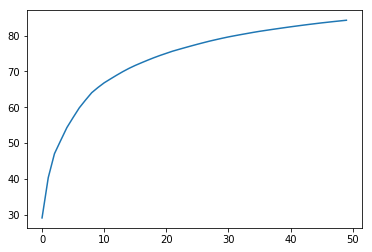

In [13]:
plt.plot(var1)

In [14]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
from optparse import OptionParser
from sklearn.decomposition import PCA
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap
from pydiffmap import diffusion_map as dm

0:02:00.418027


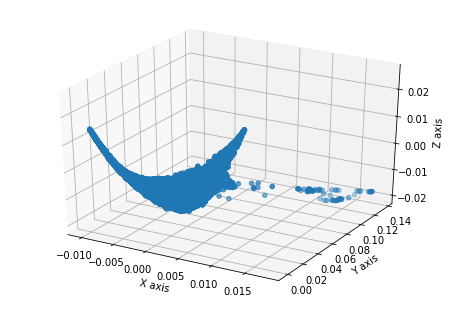

In [19]:
start=datetime.datetime.now()
neighbor_params = {'n_jobs': -1, 'algorithm': 'kd_tree'} 
mydmap = dm.DiffusionMap(n_evecs=3, k=10, epsilon=1000000000, alpha=1.0, neighbor_params=neighbor_params)
X_new = mydmap.fit_transform(images_reduced)
end=datetime.datetime.now()
print(end-start)


# fig = plt.figure()
# # plt.title("Projected data")
# plt.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 3], cmap=plt.cm.Spectral)
# plt.axis('tight')
# plt.xticks([]), plt.yticks([])
# plt.show()


fig = plt.figure()
ax=Axes3D(fig)
# ax.set_title("Original data")
ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], cmap=plt.cm.Spectral)
plt.axis('tight')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_new)
for i in range(10):
    total = 0
    for x in kmeans.labels_:
        if x == i: total += 1
    print(total)

6738
7554
45
2722
12142
38
1304
5832
2363
11262


In [17]:
i = 0
for x in X_new:
    if x[0] < -.5:
        print("1 " + str(x))
        print(i)
    elif x[1] > .5:
        print("2 " + str(x))
        print(i)
    elif x[2] < -.5:
        print("3 " + str(x))
        print(i)
    elif x[2] <-0.05 and x[2] > -.5:
        print("4 " + str(x))
        print(i)
    i +=1
